# 🧊 Frozen Lake Reinforcement learning

frozen lake is a environment that is 4 x 4 and has 16 grid spaces. There are frozen fields and there are water pits. The goal of this game is to get from one corner to the other by reinforcement learning to teach a model how to navigate so that he doest fall in the water.

[Here the followed tutorial.](https://towardsdatascience.com/q-learning-for-beginners-2837b777741)
<br>
[Here is gymnasium Frozen Lake.](https://gymnasium.farama.org/environments/toy_text/frozen_lake/#frozen-lake)
<br>
[Here is another link.](https://gymnasium.farama.org/tutorials/training_agents/FrozenLake_tuto/)
<br>
[Explanation on Q-table](https://www.datacamp.com/tutorial/introduction-q-learning-beginner-tutorial)



**The frozen lake grid looks something like this:**

>S F F F       (S: starting point, safe)
<br>
>F H F H       (F: frozen surface, safe)
<br>
>F F F H       (H: hole, stuck forever)
<br>
>H F F G       (G: goal, safe)

<br>

Let's start by setting up the environment. The excersize mentioned using the is_slippery parameter to check the differences in results. The "is_slippery" refers to how the game responds to the actions chosen by the agent. the non-slippery version will have the same outcome, the slippery version will have random actions which will have other effects on the response. 

I will first follow this tutorial to get an idea of how to work with gymnasium.

In [2]:
import gym
import numpy as np

env = gym.make('FrozenLake-v1', map_name="4x4",is_slippery=False)
env.reset()
env.render()

/Users/alex/opt/anaconda3/envs/imblearn/lib/python3.11/site-packages/gym/envs/toy_text/frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


## Q-learning

Using Q-learning will add value to the different actions the model takes which will give it knowledge on what action is the best at a given state. A Q-table is a nice way of representing this method. this table has cells containing the value *Q(s,a)*.

- S for state ( 0 = bad, 1 = possible )
- A is the action ( going up, down, left or right )



In [3]:
# Our table has the following dimensions:
# (rows x columns) = (states x actions) = (16 x 4)
qtable = np.zeros((16, 4))

# Alternatively, the gym library can also directly g
# give us the number of states and actions using 
# "env.observation_space.n" and "env.action_space.n"
nb_states = env.observation_space.n  # = 16
nb_actions = env.action_space.n      # = 4
qtable = np.zeros((nb_states, nb_actions))

# Let's see how it looks
print('Q-table =')
print(qtable)

Q-table =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Fixed the error I got with many tutorials 

[By this link.](https://stackoverflow.com/questions/75971147/q-learning-code-error-while-running-how-can-i-fix-it)

# ❄️ How does it work?

with Q-Learning, To reach the goal, the model tries to find the goal and when it does the closest grid next to the goal gets an updated value.
<br> 

`The new value is the current one + the reward + the highest value in the next state.`

<br>
The next time the model gets next to that updated value it will also update the grid that is beside it. So our course of action will be -> choosing a random action, implementing this action and updating the value. This course will ed up either at the goal or in a hole. 



Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.       0.       0.59049  0.      ]
 [0.       0.       0.6561   0.      ]
 [0.       0.729    0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.151875 0.      ]
 [0.       0.9      0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.225    0.      ]
 [0.       0.       1.       0.      ]
 [0.       0.       0.       0.      ]]


/Users/alex/opt/anaconda3/envs/imblearn/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


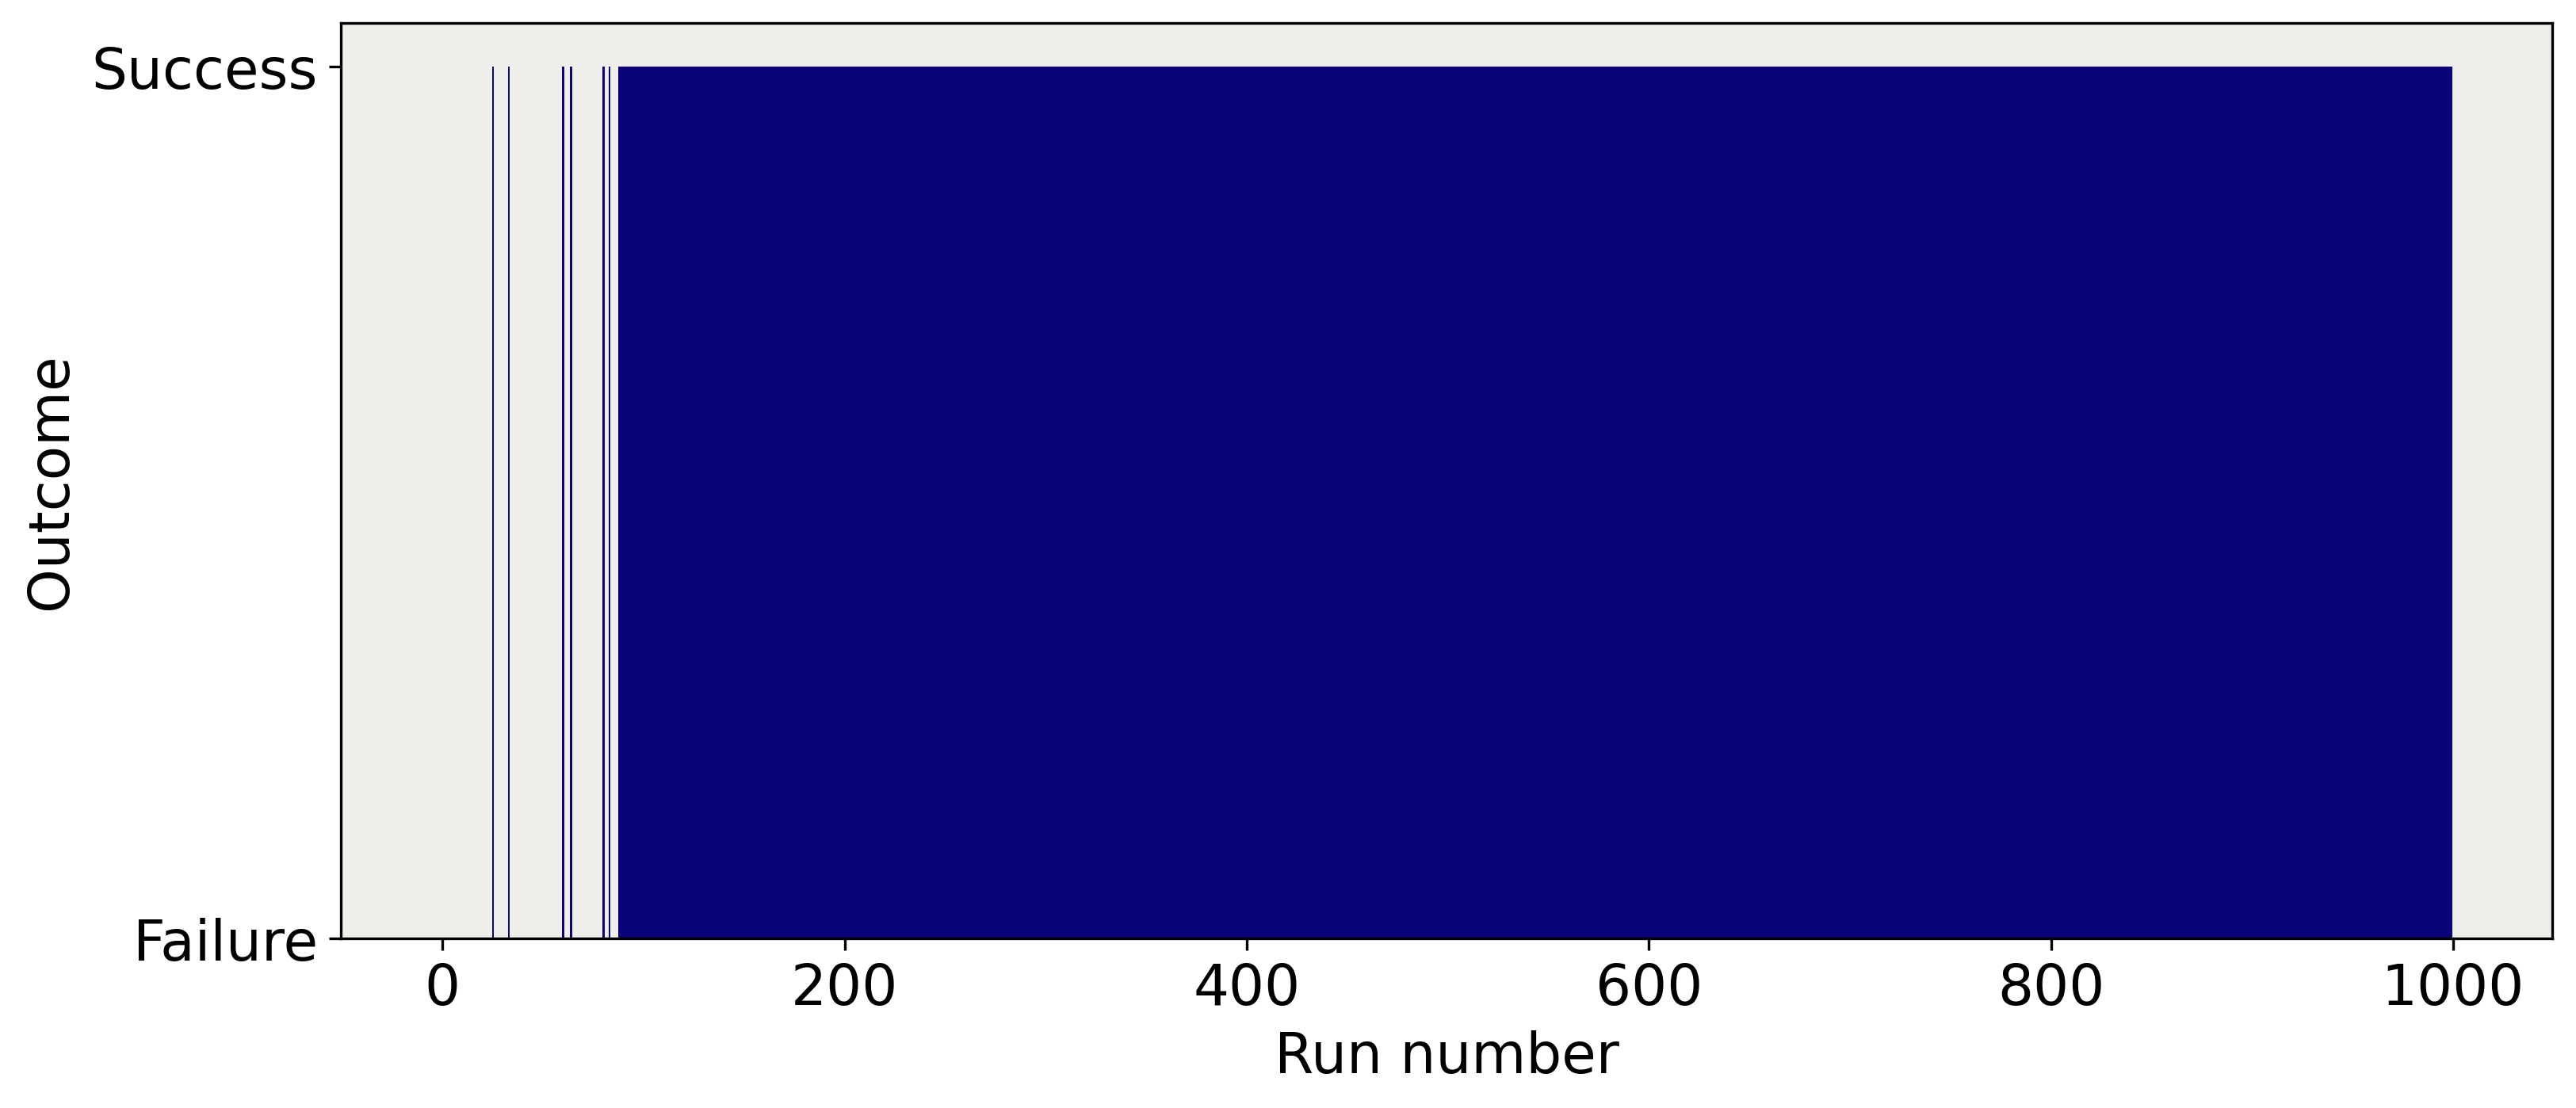

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# We re-initialize the Q-table
qtable = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = env.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = env.action_space.sample()
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = env.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

 ## ⛄️ Epsilon-Greedy algorithm
 When you leave the Q-table as is the model will always take the same route as it has found has the highest value. This means it will never diverge from it. This also means the values never get updated. There is a way to give it the oppurtunity to:

- Take the action with the highest value (exploitation);
- Choose a random action to try to find even better ones (exploration).

This is the trade off. Right now the model only exploits. We want the model to also explore other options by making the desicion not to go for the highest value but to choose a random aciton. To make it less static and more flexible. Greedy stands for exploitation because it just goes for the highest reward.

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode 0: Total Reward = 0.0, Steps = 8
Episode 100: Total Reward = 0.0, Steps = 13
Episode 200: Total Reward = 0.0, Steps = 15
Episode 300: Total Reward = 0.0, Steps = 8
Episode 400: Total Reward = 0.0, Steps = 2
Episode 500: Total Reward = 1.0, Steps = 11
Episode 600: Total Reward = 1.0, Steps = 6
Episode 700: Total Reward = 1.0, Steps = 6
Episode 800: Total Reward = 1.0, Steps = 8
Episode 900: Total Reward = 1.0, Steps = 6

Q-table after training:
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.59048924]
 [0.59048981 0.729      0.59017103 0.65609998]
 [0.65607347 0.         0.37777433 0.29522112]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.      

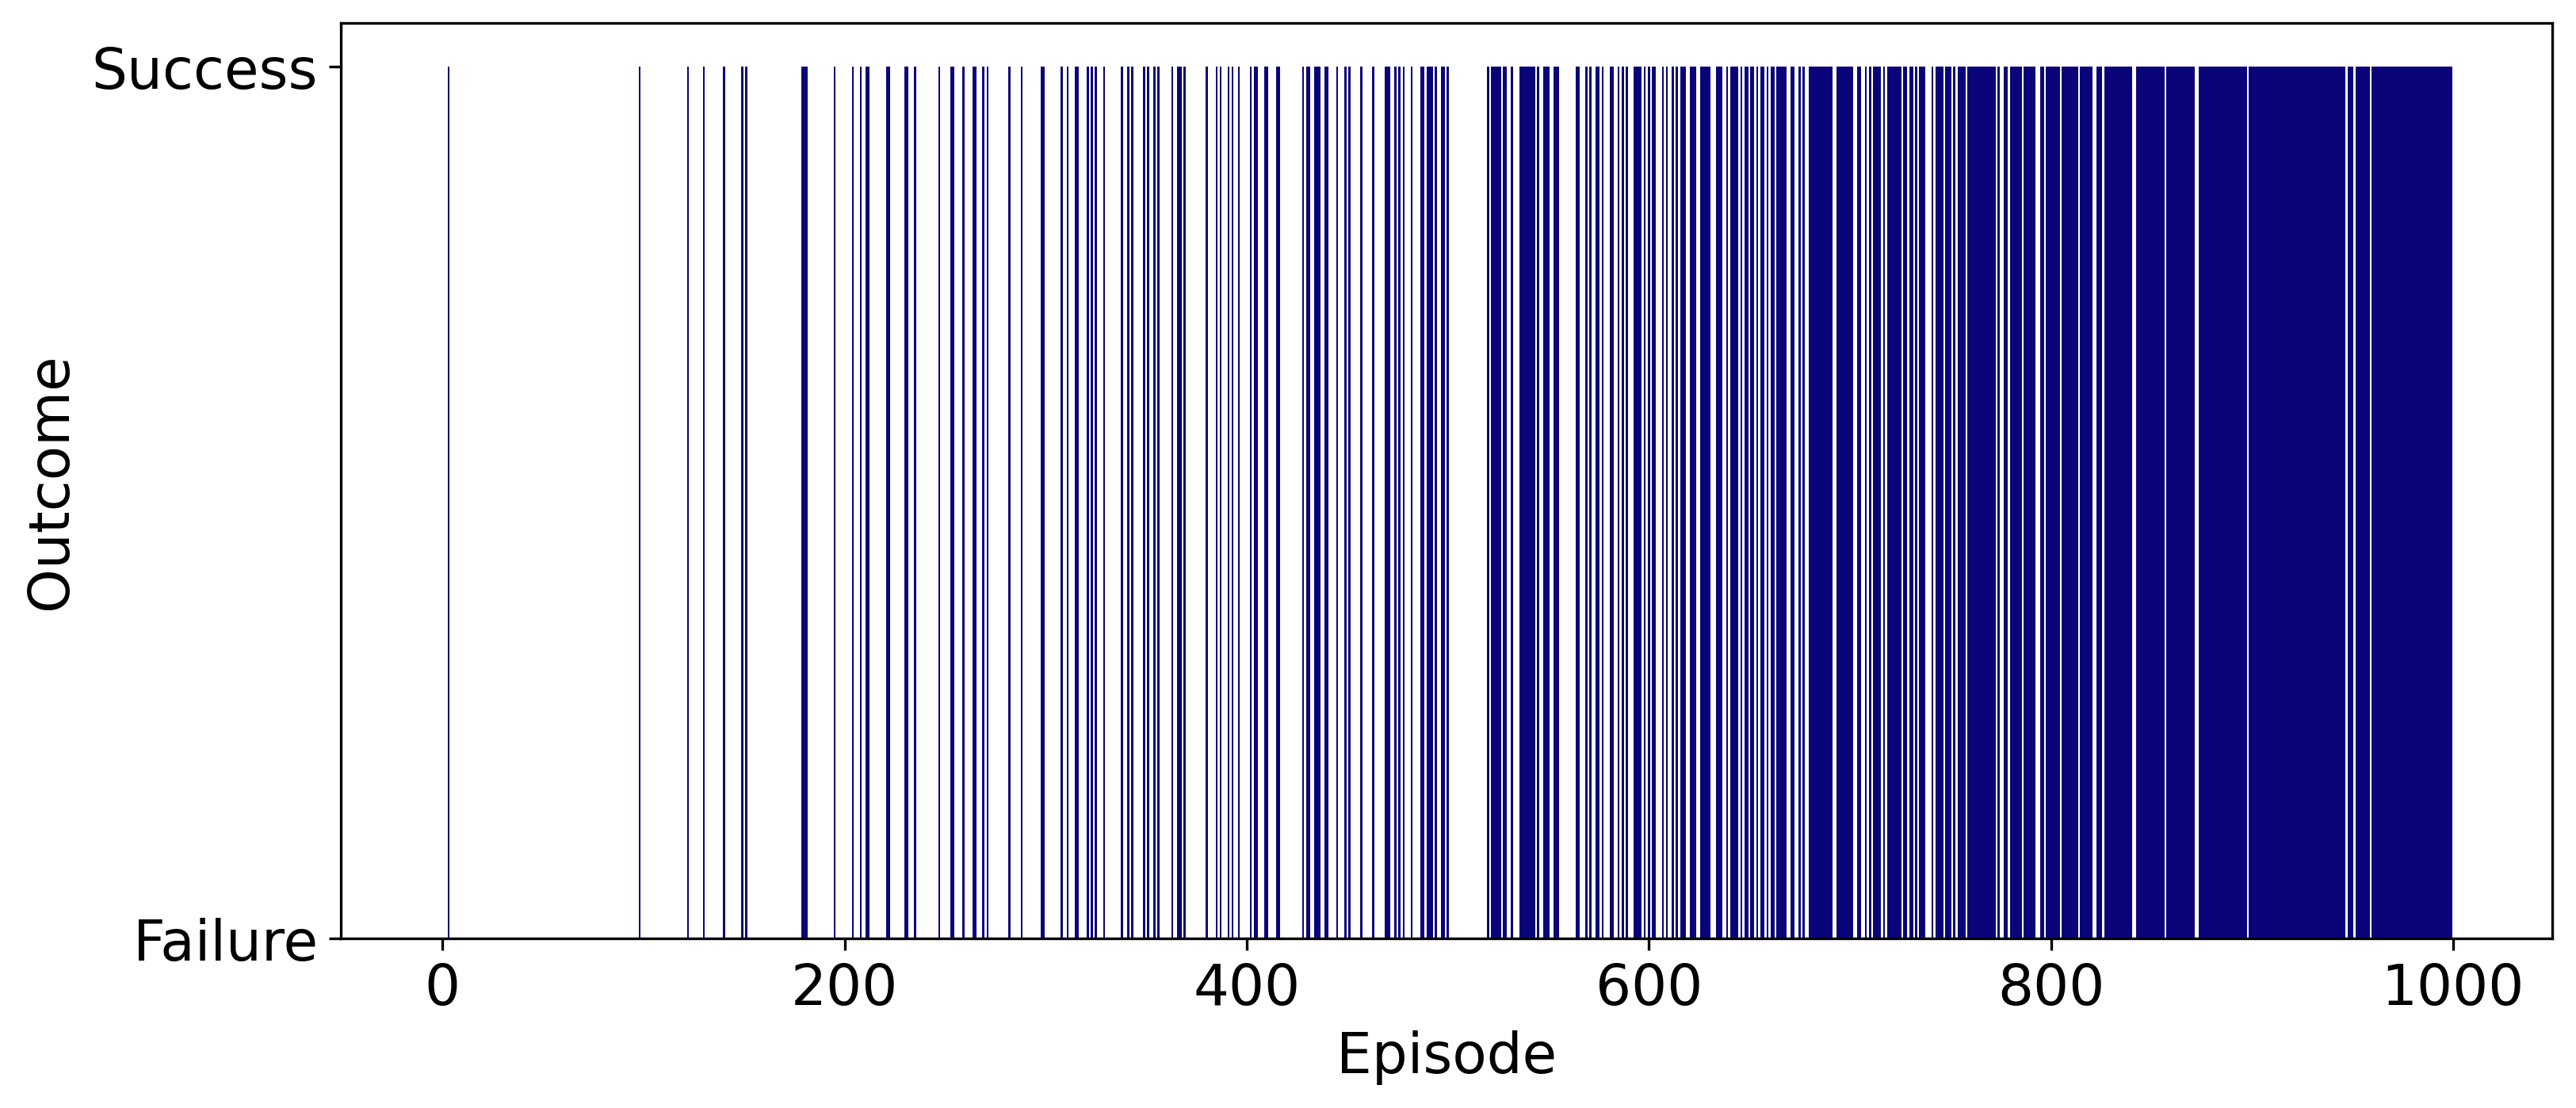

In [48]:
# Initialize Q-table with zeros
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Exploration rate
epsilon_decay = 0.001  # Decay rate for exploration

# List of outcomes to plot
outcomes = []
print('Q-table before training:')
print(q_table)

# Training
avg_reward = 0
avg_steps = 0
for i in range(episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0
    steps = 0
    
    while not done:
        # epsilon-greedy action selection
        if random.random() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])          # Exploit
        
        # Take action and observe next state and reward
        next_state, reward, done, info, _ = env.step(action)
        
        # Update Q-table
        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])
        
        # Update state and statistics
        state = next_state
        total_reward += reward
        steps += 1
    
    # Decay epsilon
    epsilon = max(epsilon - epsilon_decay, 0)
    
    # Update average reward and steps
    avg_reward += total_reward
    avg_steps += steps
    
    # Add outcome to list
    outcomes.append("Success" if total_reward > 0 else "Failure")
    
    # Print progress
    if i % 100 == 0:
        print("Episode {}: Total Reward = {}, Steps = {}".format(i, total_reward, steps))

print()
print('===========================================')
print('Q-table after training:')
print(q_table)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Episode")
plt.ylabel("Outcome")
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

# 🫧 Results on full Exploitation or Epsilon-Greedy 

From the two graphs I can see that the exploiting model learns really quickly what the road to the Goal is and does not differ from it. This conclusion I make from the Q-table that shows only a few values have been updated. The Epsilon-Greedy model takes a longer time to find the accurate round because of the randomness involved, but the Q-table shows it had explored more options.

In [6]:
episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    state = env.reset()[0]
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = env.action_space.sample()
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = env.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


## Both options have a succes rate of 100%
*this code is only showing the epsilon-greedy succes rate*

In [7]:
from IPython.display import clear_output
import time 

state = env.reset()[0]
done = False
sequence = []

while not done:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # If there's no best action (only zeros), take a random one
    else:
      action = env.action_space.sample()
    
    # Add the action to the sequence
    sequence.append(action)

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, info, _ = env.step(action)

    # Update our current state
    state = new_state

    # Update the render
    clear_output(wait=True)
    env.render()
    time.sleep(1)

print(f"Sequence = {sequence}")

Sequence = [1, 1, 2, 2, 1, 2]


# Sequense shown above

This is the sequense of steps made by the model. ( down, down, left, left, down, left). There are a few more options the model could've choose from. 

# 🥶 8x8 Frozen lake, how do we make it un-stupid?

In [86]:
environment = gym.make('FrozenLake-v1', map_name="8x8",is_slippery=False)
environment.reset()
environment.render()

/Users/alex/opt/anaconda3/envs/imblearn/lib/python3.11/site-packages/gym/envs/toy_text/frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


## 🏂🏽 Model only exploiting

After doing some research I noticed that the simple 4x4 methods work different on a 8x8 grid. This is because it takes the agent more time to find the correct road. My first try I did 1000 episodes just like in the 4x4 grid, this gave me a graph filled with failiures because the model has more options and also needs more time to find the right path. After doing 3000 episodes ( as you can see down here ) you can see that the model around the 1000 episode it starts to learn a few values and when it has one path it keeps taking that path. 

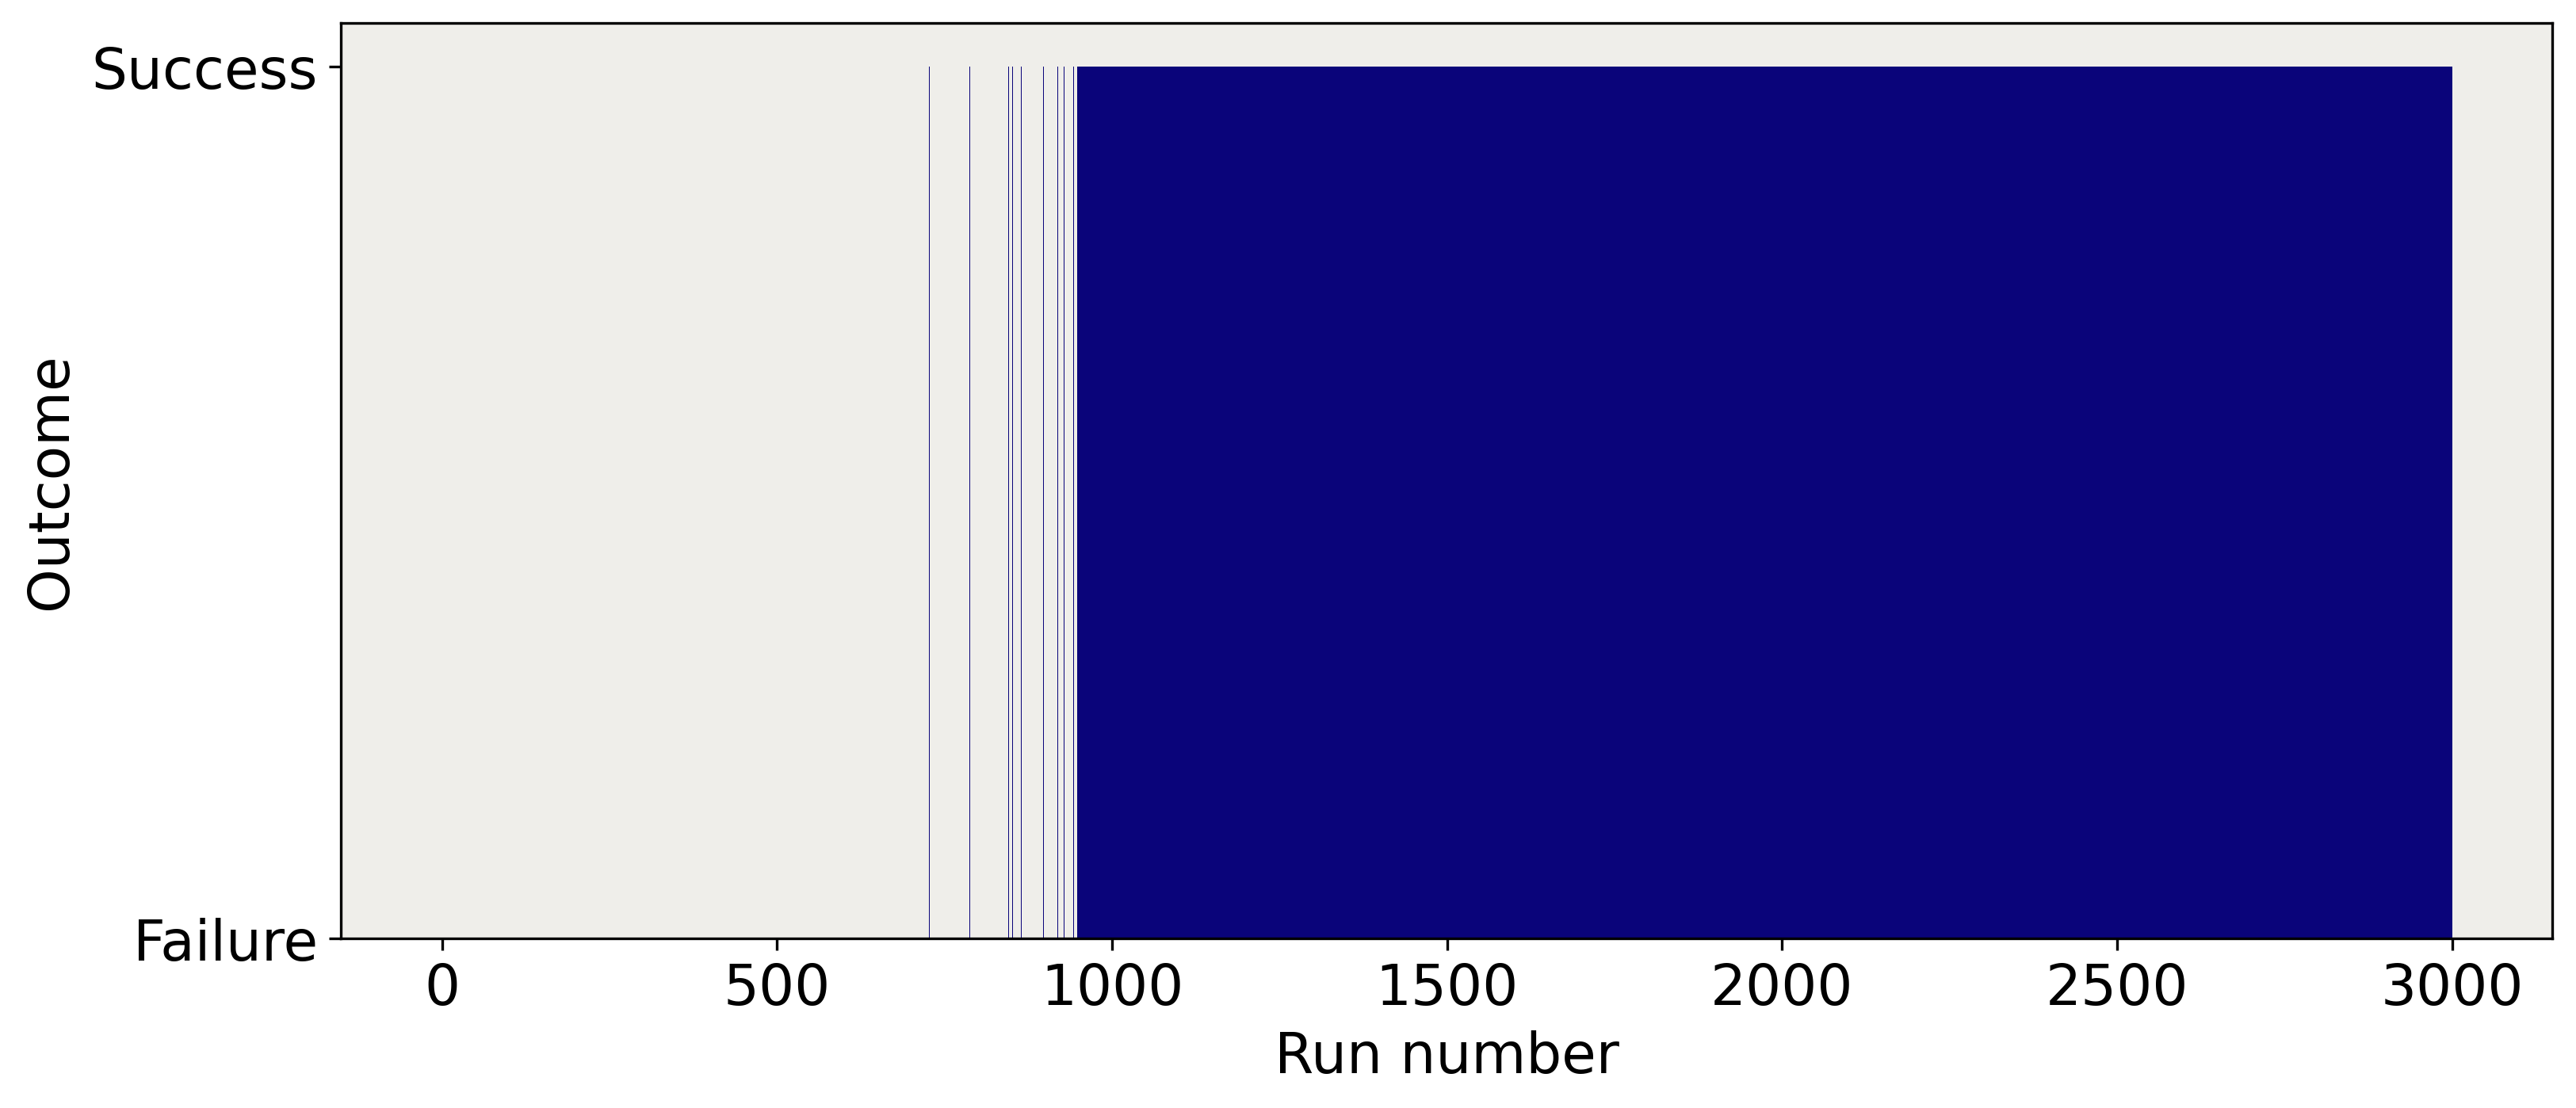

In [69]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 3000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor

# List of outcomes to plot
outcomes = []

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

## Conclusion 

*After doing the epsilon greedy i noticed that this ^ is pure luck, because the model just needs to "luckely" find the last gridspace before the reward and so on. Usually this would take ALOT more episodes and a bigger decay rate. I will show you this in the epsilon-greedy model.*

# Model with Epsilon-Greedy

When comparing these two different parameters I can see a big difference in learning. I was wondering why this changes the way of learning. 

- A low learning rate and a low discount factor meant the agent will choose immediate rewards more then future rewards. This works for short-term environments but not for long-term strategies. This is because the agent relies more on learned behavior and not on random actions.
- With a high learning rate and discount factor the agents learns its q-values quick based on new information. This works well for environments that change alot. The agent also has high value on future rewards this is good for actions based on long term strategies. The slow epsilon decay means that the agent keeps exploring alot this is why the agent takes a while to actually exploits on what he has learned.

Both of these parameters do the job but they have a higher function when it comes to what problem you actually want to solve. Because the 8x8 grid is bigger then the 4x4 the seconf option that focusses more on the future reward is more useful for this problem.

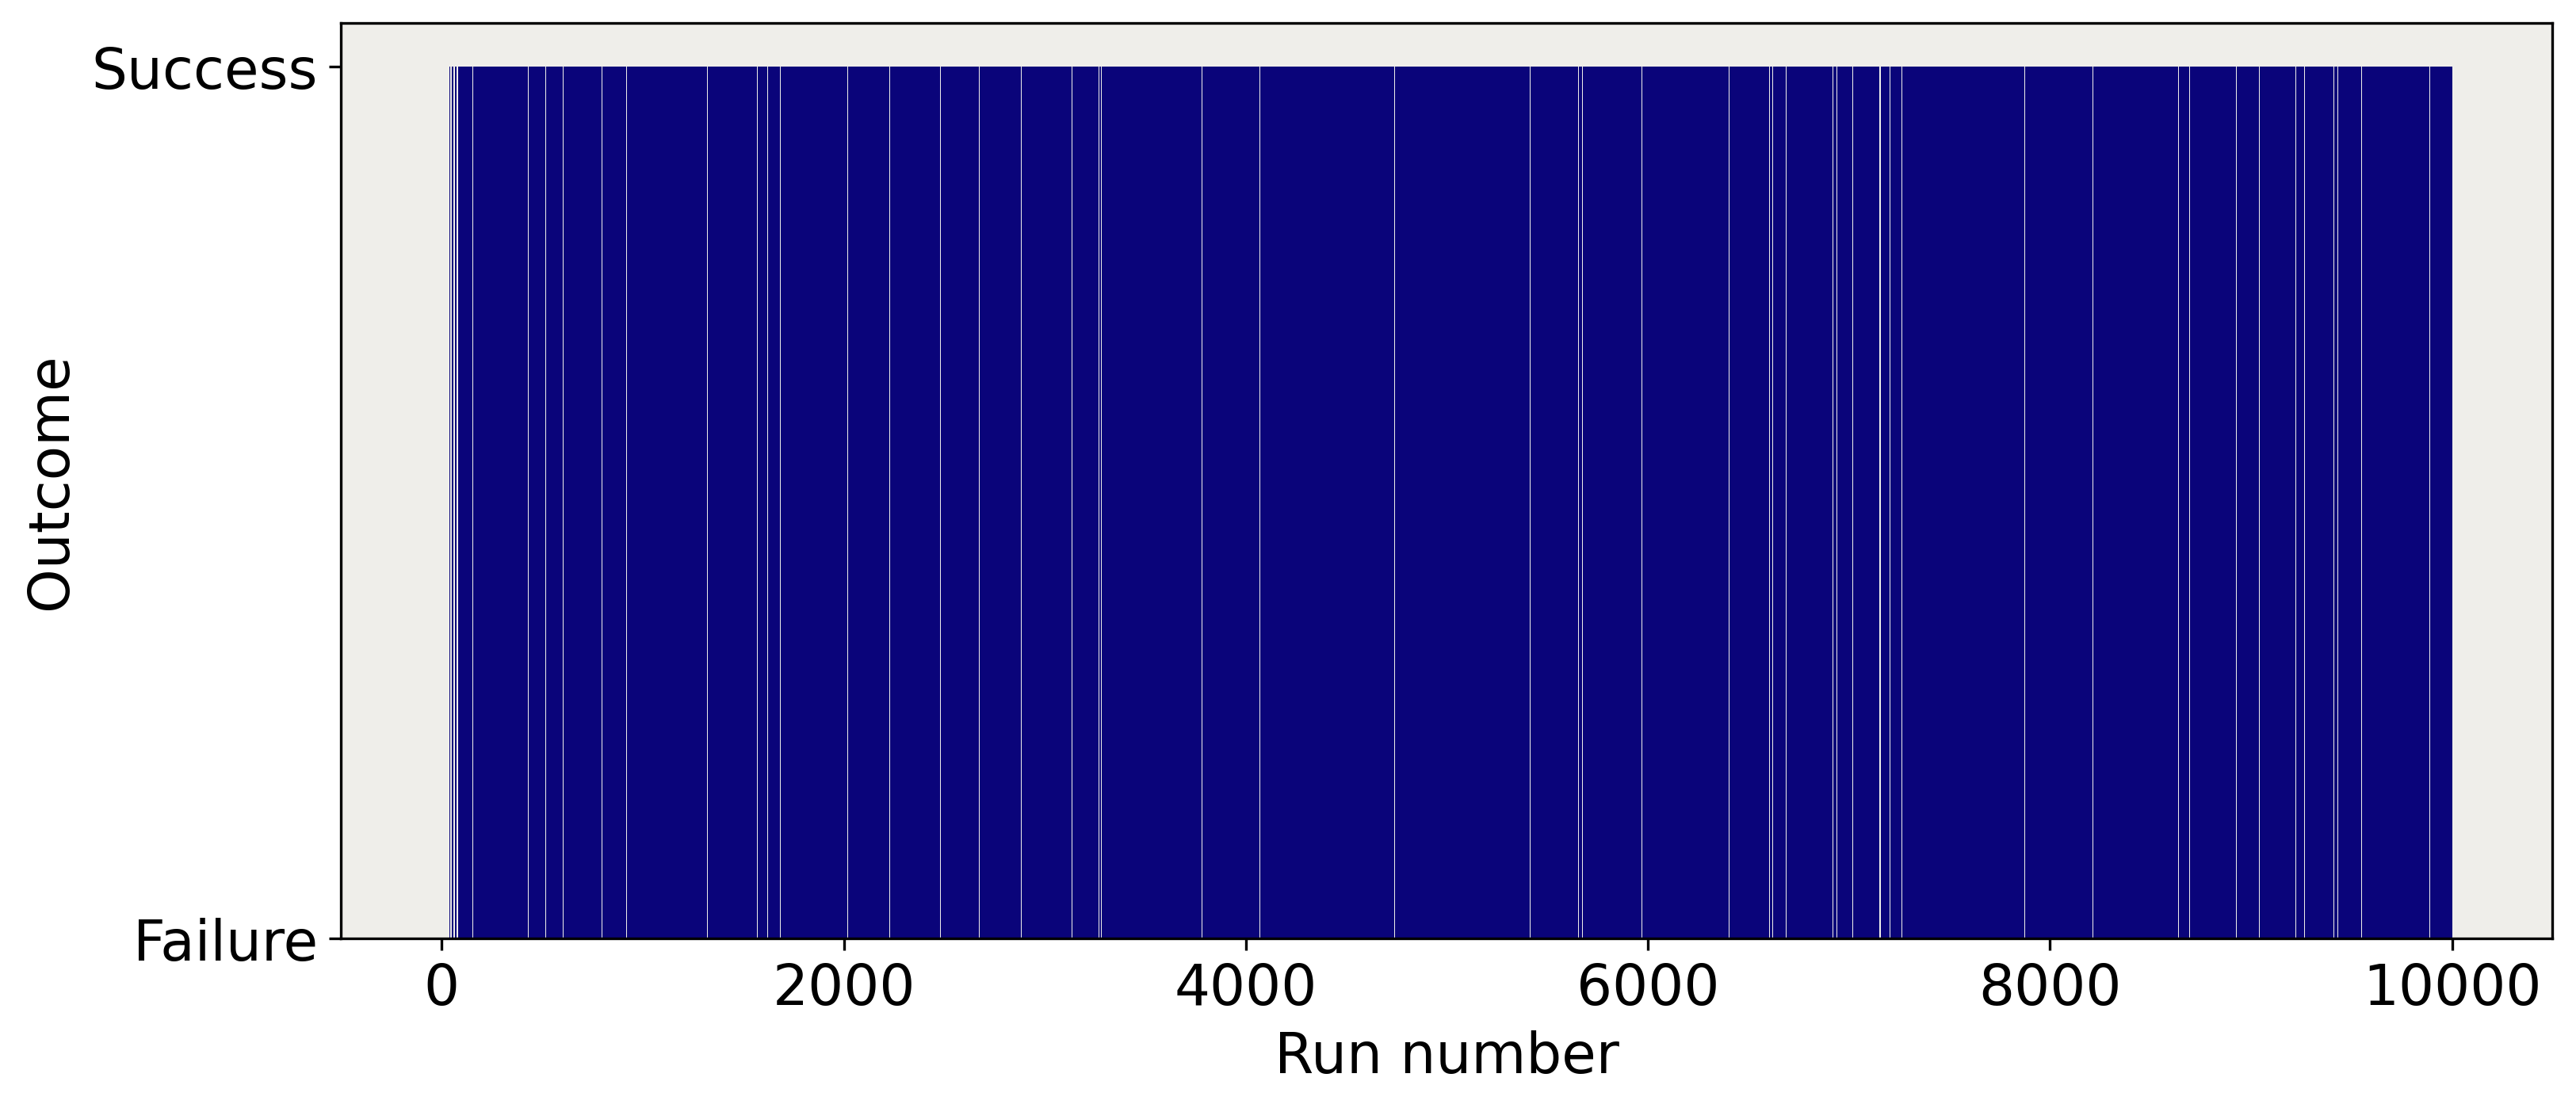

In [101]:
import random

# Hyperparameters
episodes = 10000      # Total number of episodes
alpha = 0.3         # Learning rate
gamma = 0.5          # Discount factor
epsilon = 1.0          # Initial epsilon for epsilon-greedy strategy
min_epsilon = 0.01     # Minimum epsilon
decay_rate = 0.01     # Decay rate for epsilon per episode

# List of outcomes to plot
outcomes = []

# Training loop
for episode in range(episodes):
    state = environment.reset()[0]
    done = False
    outcomes.append("Failure")  # Assume failure unless a success is encountered

    while not done:
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = environment.action_space.sample()  # Explore: random action
        else:
            action = np.argmax(qtable[state])  # Exploit: choose best action from Q-table
        
        # Implement action
        new_state, reward, done, info, _ = environment.step(action)

        # Update Q-table using the Q-learning update rule
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        state = new_state  # Move to the next state
        
        if reward:
            outcomes[-1] = "Success"  # Update outcome if successful
    
    # Decay epsilon
    epsilon = max(min_epsilon, epsilon - decay_rate)  # Decrease epsilon

# Plotting the outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

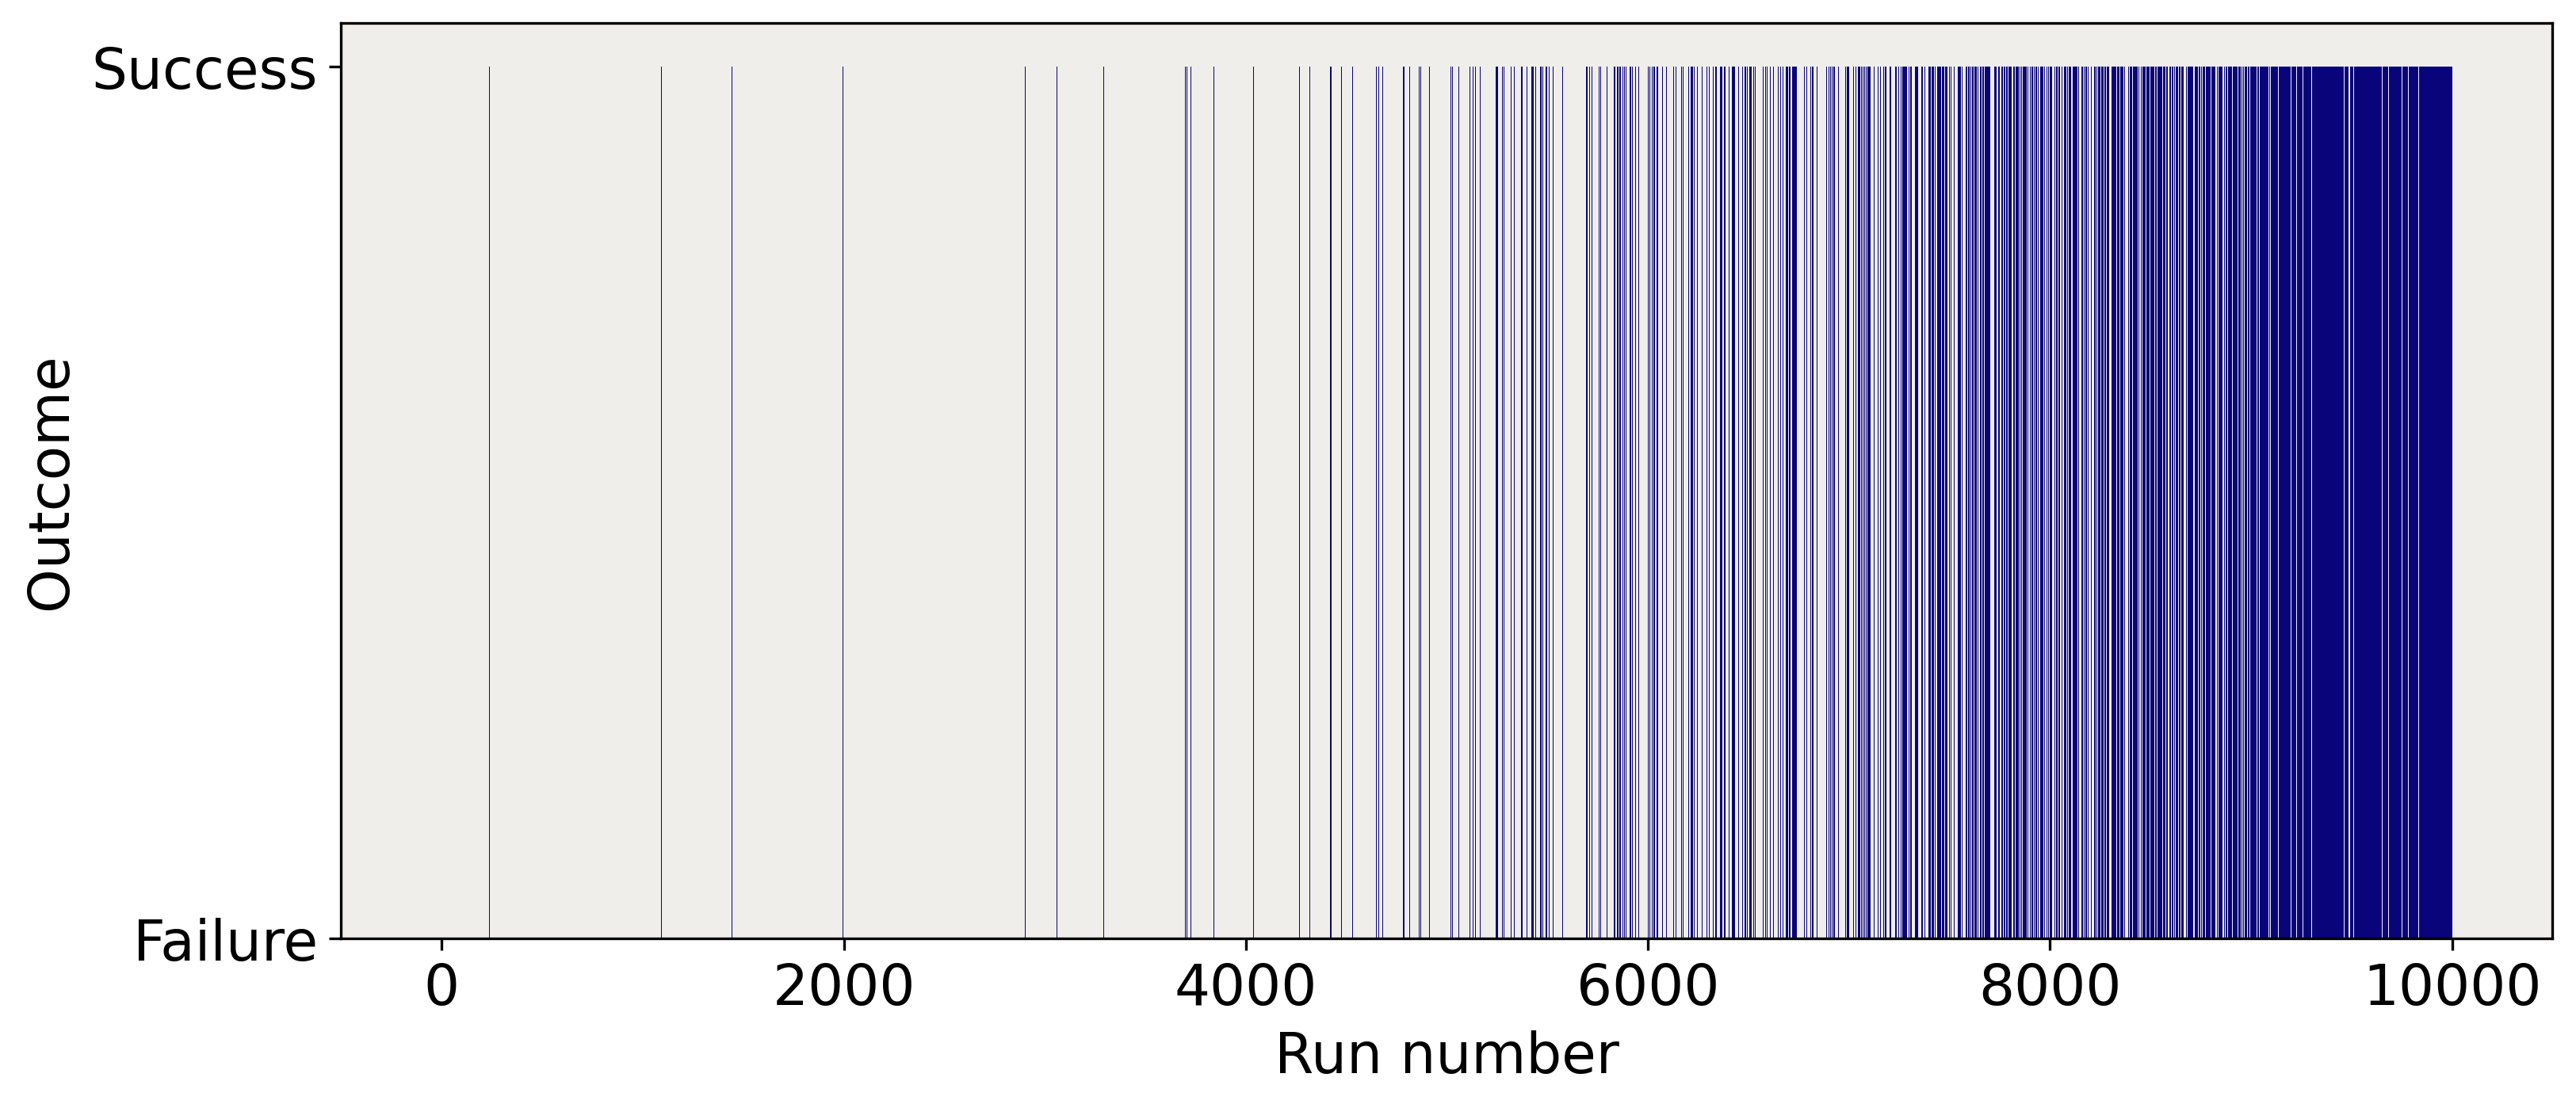

In [82]:

# Hyperparameters
episodes = 10000        # Total number of episodes
alpha = 0.9           # Learning rate
gamma = 0.99            # Discount factor
epsilon = 1.0          # Initial epsilon for epsilon-greedy strategy
min_epsilon = 0.01     # Minimum epsilon
decay_rate = 0.0001     # Decay rate for epsilon per episode

# List of outcomes to plot
outcomes = []

# Training loop
for episode in range(episodes):
    state = environment.reset()[0]
    done = False
    outcomes.append("Failure")  # Assume failure unless a success is encountered

    while not done:
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = environment.action_space.sample()  # Explore: random action
        else:
            action = np.argmax(qtable[state])  # Exploit: choose best action from Q-table
        
        # Implement action
        new_state, reward, done, info, _ = environment.step(action)

        # Update Q-table using the Q-learning update rule
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        state = new_state  # Move to the next state
        
        if reward:
            outcomes[-1] = "Success"  # Update outcome if successful
    
    # Decay epsilon
    epsilon = max(min_epsilon, epsilon - decay_rate)  # Decrease epsilon

# Plotting the outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

## Is_slippery = True

When is_slippery is off the model is more predictable because it chooses the the direction it wants to go in. This makes learning easier because it learns the right path faster. If is_slippery is on it implements randomness into the equasion, so with epsilon greedy it will add even more randomness. In a is_slippery environment it is important to have a higher discount factor because it makes the agent focus on future rewards and not immediate rewards since it has more randomness. Also having a slow decay is usefull for the angent to understand all the possible outcomes.


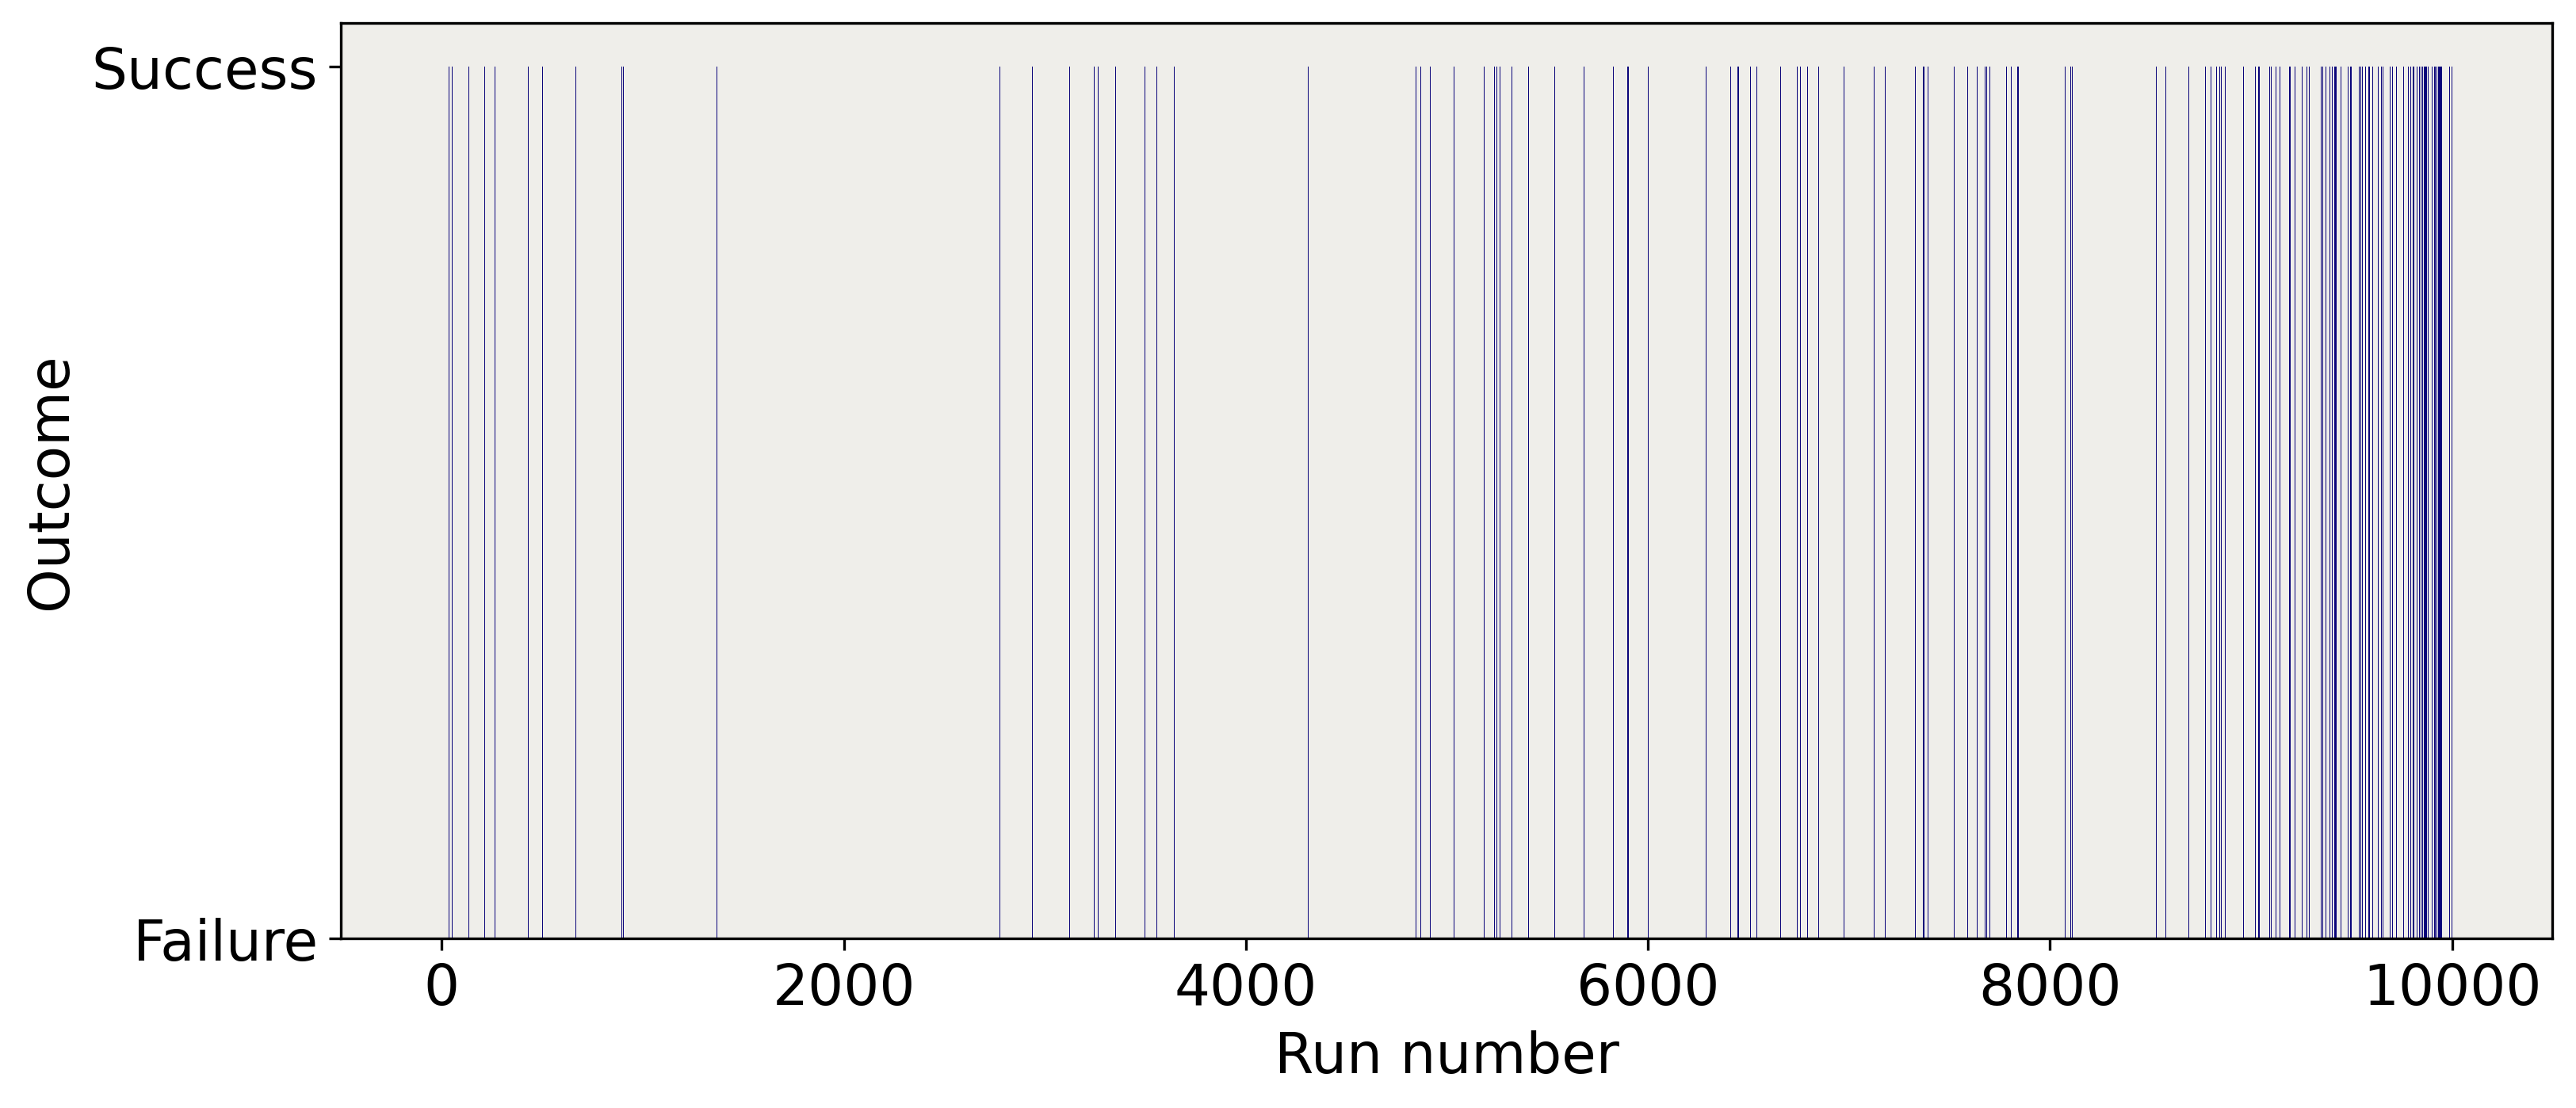

Success rate = 52.0%


In [120]:
environment = gym.make("FrozenLake-v1", is_slippery=True)
environment.reset()

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 10000       # Total number of episodes
alpha = 0.9            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.0001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
          action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
          action = np.argmax(qtable[state])
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)



# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    state = environment.reset()[0]
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = environment.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

## Conclusion

This shows that randomness adds a factor that increases the amount of loss. Since it is now more uncertain how the agent will react. One way we can give the agent more time to understand with this extra randomness is increasing the episodes.  

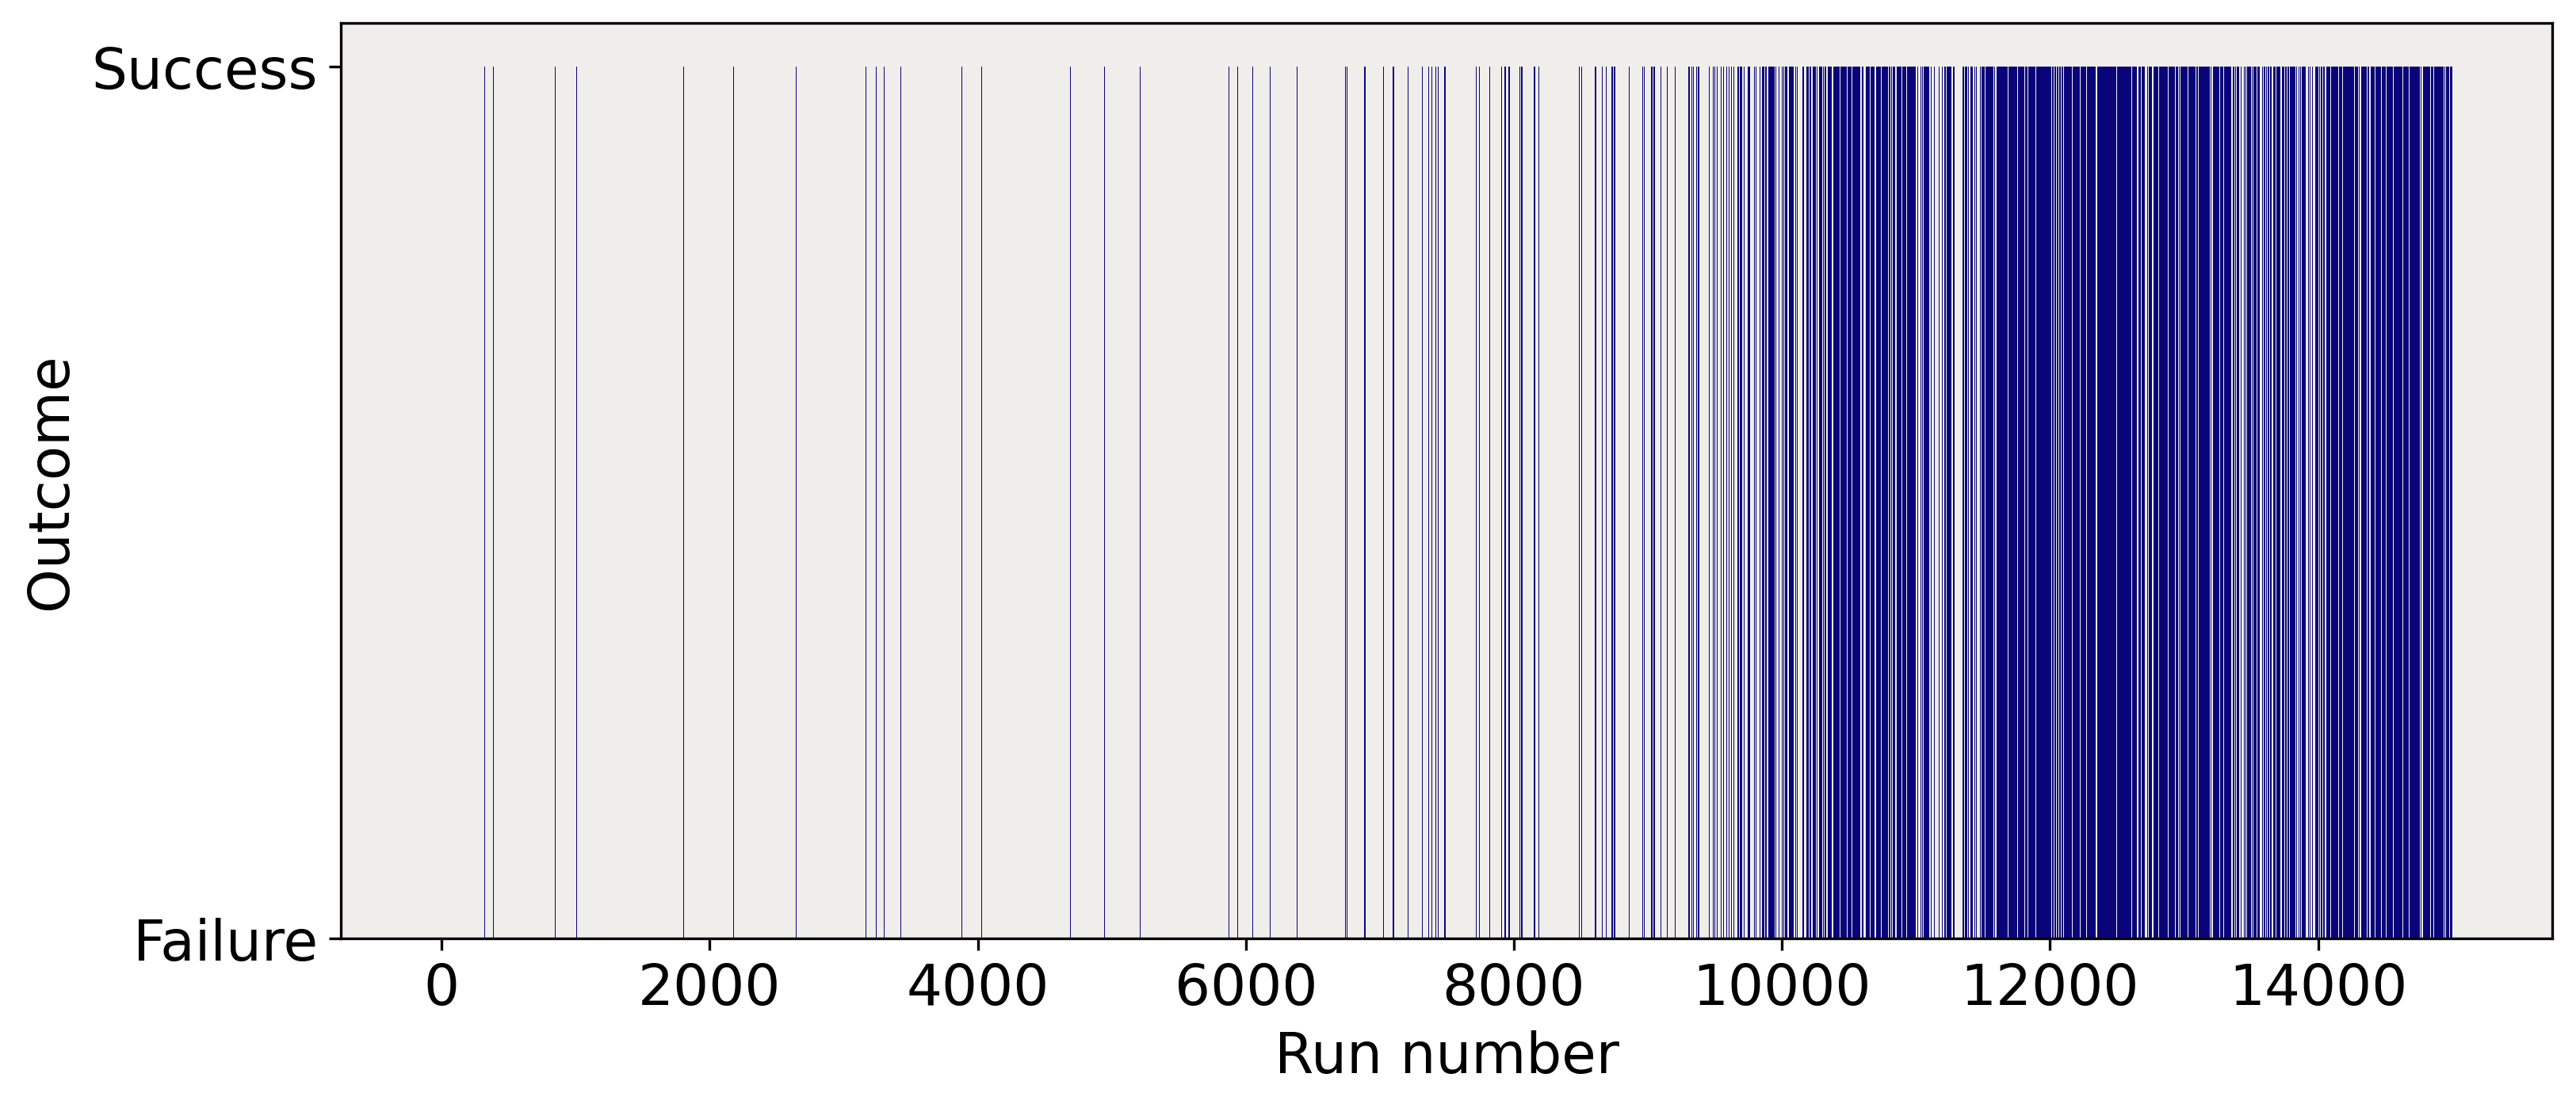

Success rate = 79.0%


In [123]:
# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 15000       # Total number of episodes
alpha = 0.9            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.0001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
          action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
          action = np.argmax(qtable[state])
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)


# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    state = environment.reset()[0]
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = environment.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

## Conclusion : More episodes

As we can see the succes rate goes up when giving it more time to learn the desicion making algorithm.


# Bad Pinguin : Negative rewards

I have been looking online for examples using the negative reward system in the frozen lake but I did not manage to find any working solution. I have asked ChatGPT to add negative rewarding to the code above. These are the results:

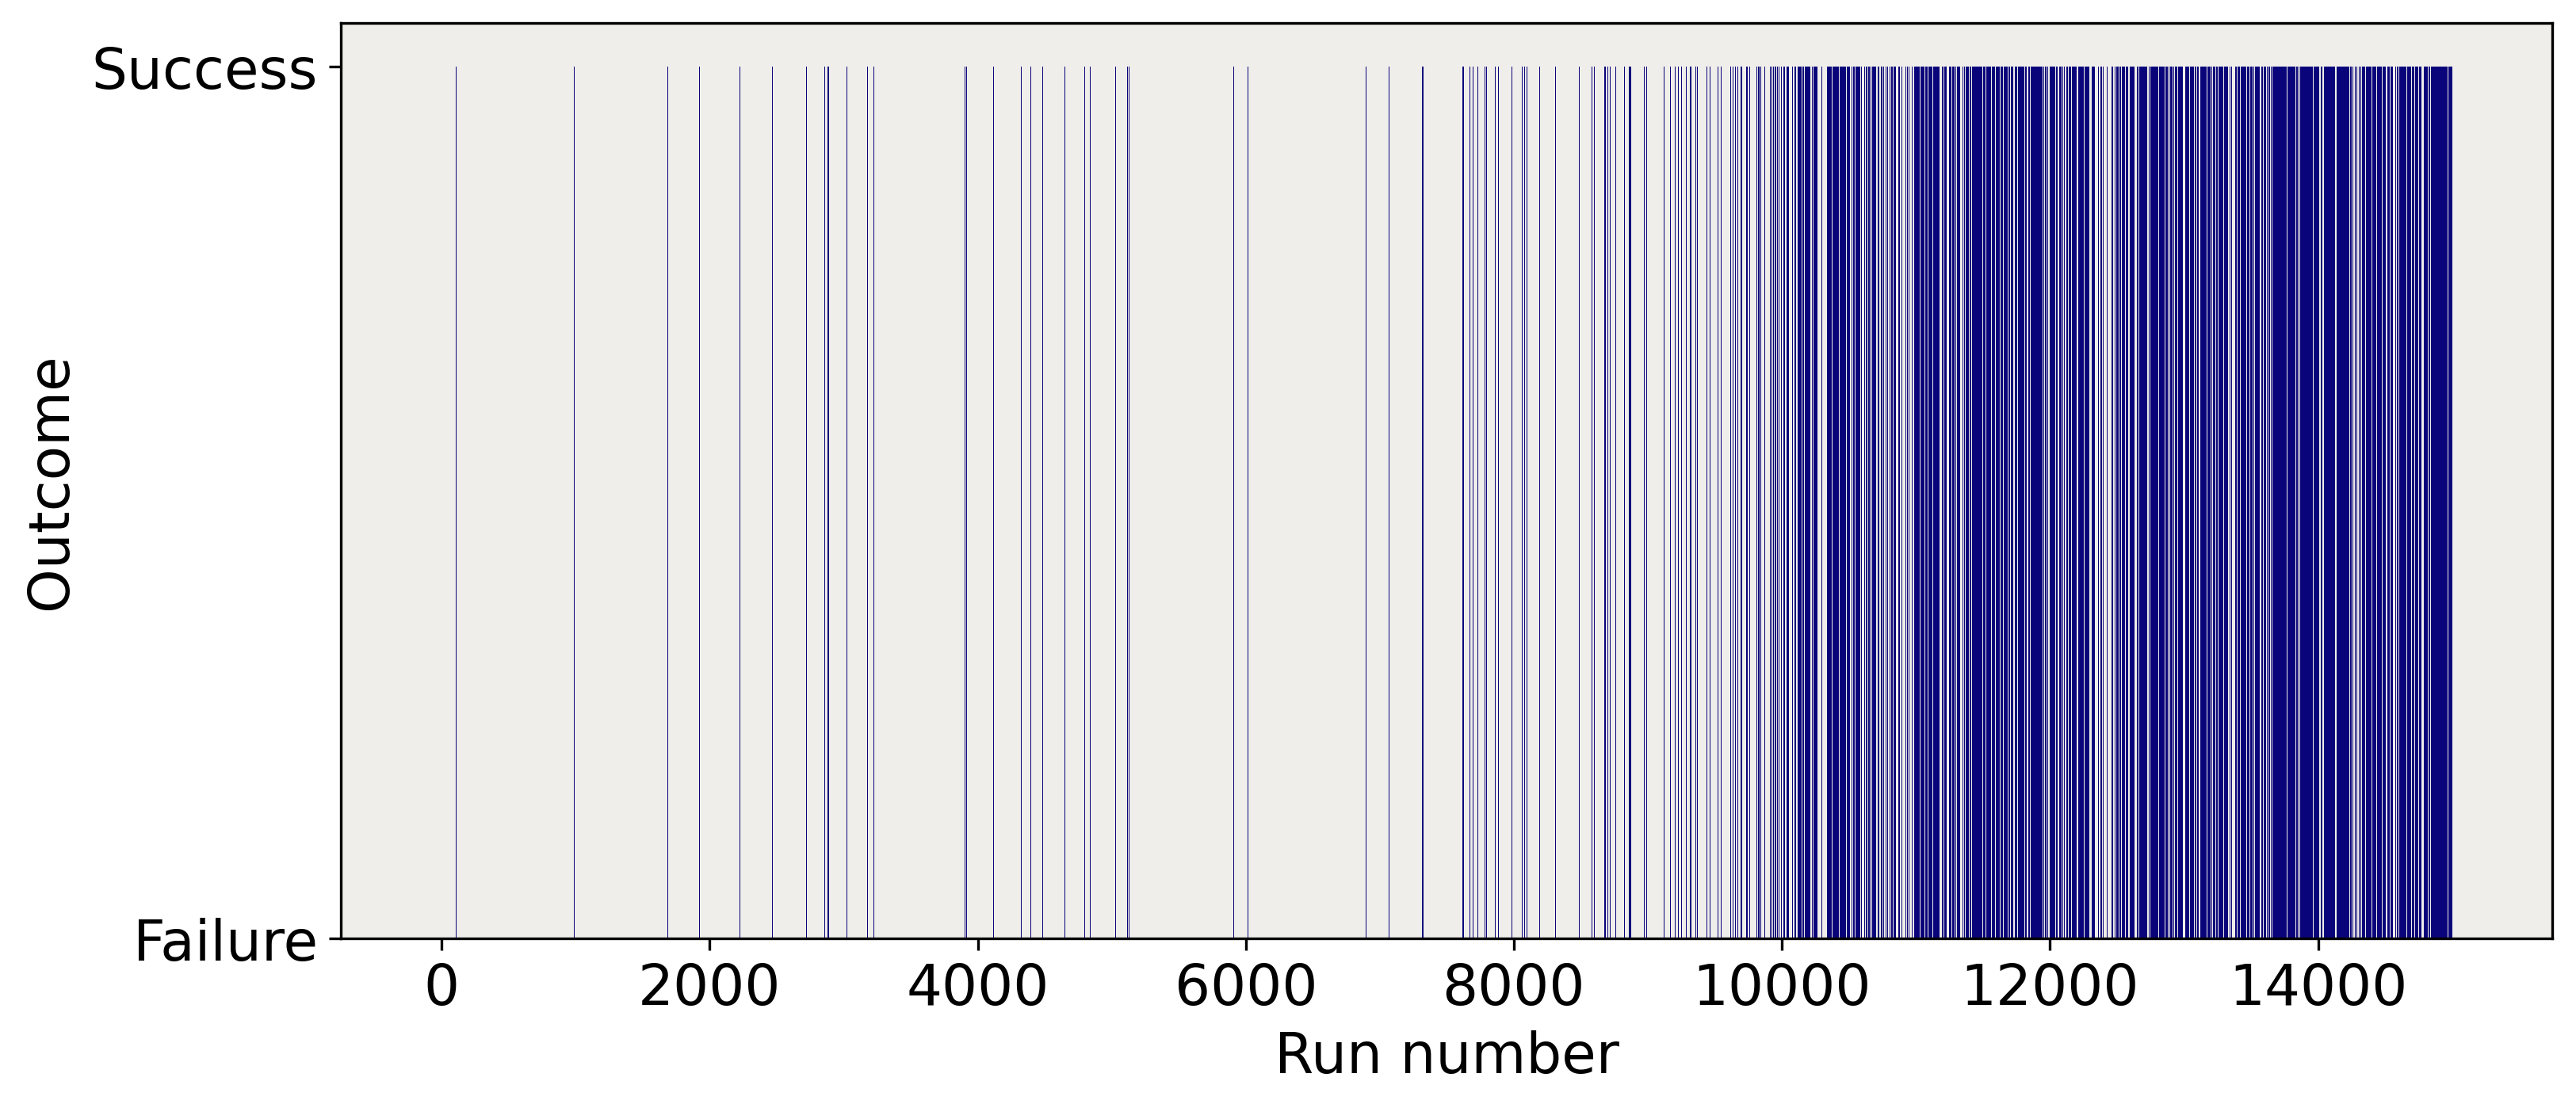

Success rate = 77.0%


In [131]:
# We re-initialize the Q-table
import numpy as np
import matplotlib.pyplot as plt

qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 15000       # Total number of episodes
alpha = 0.9            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.0001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    while not done:
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
          action = environment.action_space.sample()
        else:
          action = np.argmax(qtable[state])
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = environment.step(action)

        # Modify reward based on the game outcome
        if done and reward == 0:
            reward = -10  # Falling into a hole
        elif not done:
            reward = -1  # Stepping on a grid
        elif reward > 0:
            reward = 10  # Reaching the goal

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        state = new_state

        if reward == 10:
          outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    state = environment.reset()[0]
    done = False
    
    while not done:
        action = np.argmax(qtable[state])
        new_state, reward, done, info, _ = environment.step(action)
        state = new_state
        if done and reward > 0:
            nb_success += 1  # Increment success count only if the episode ends with a positive reward

print(f"Success rate = {nb_success/episodes*100}%")


## Conclusion 

These rewards do not make the model better so I have tried others down here:

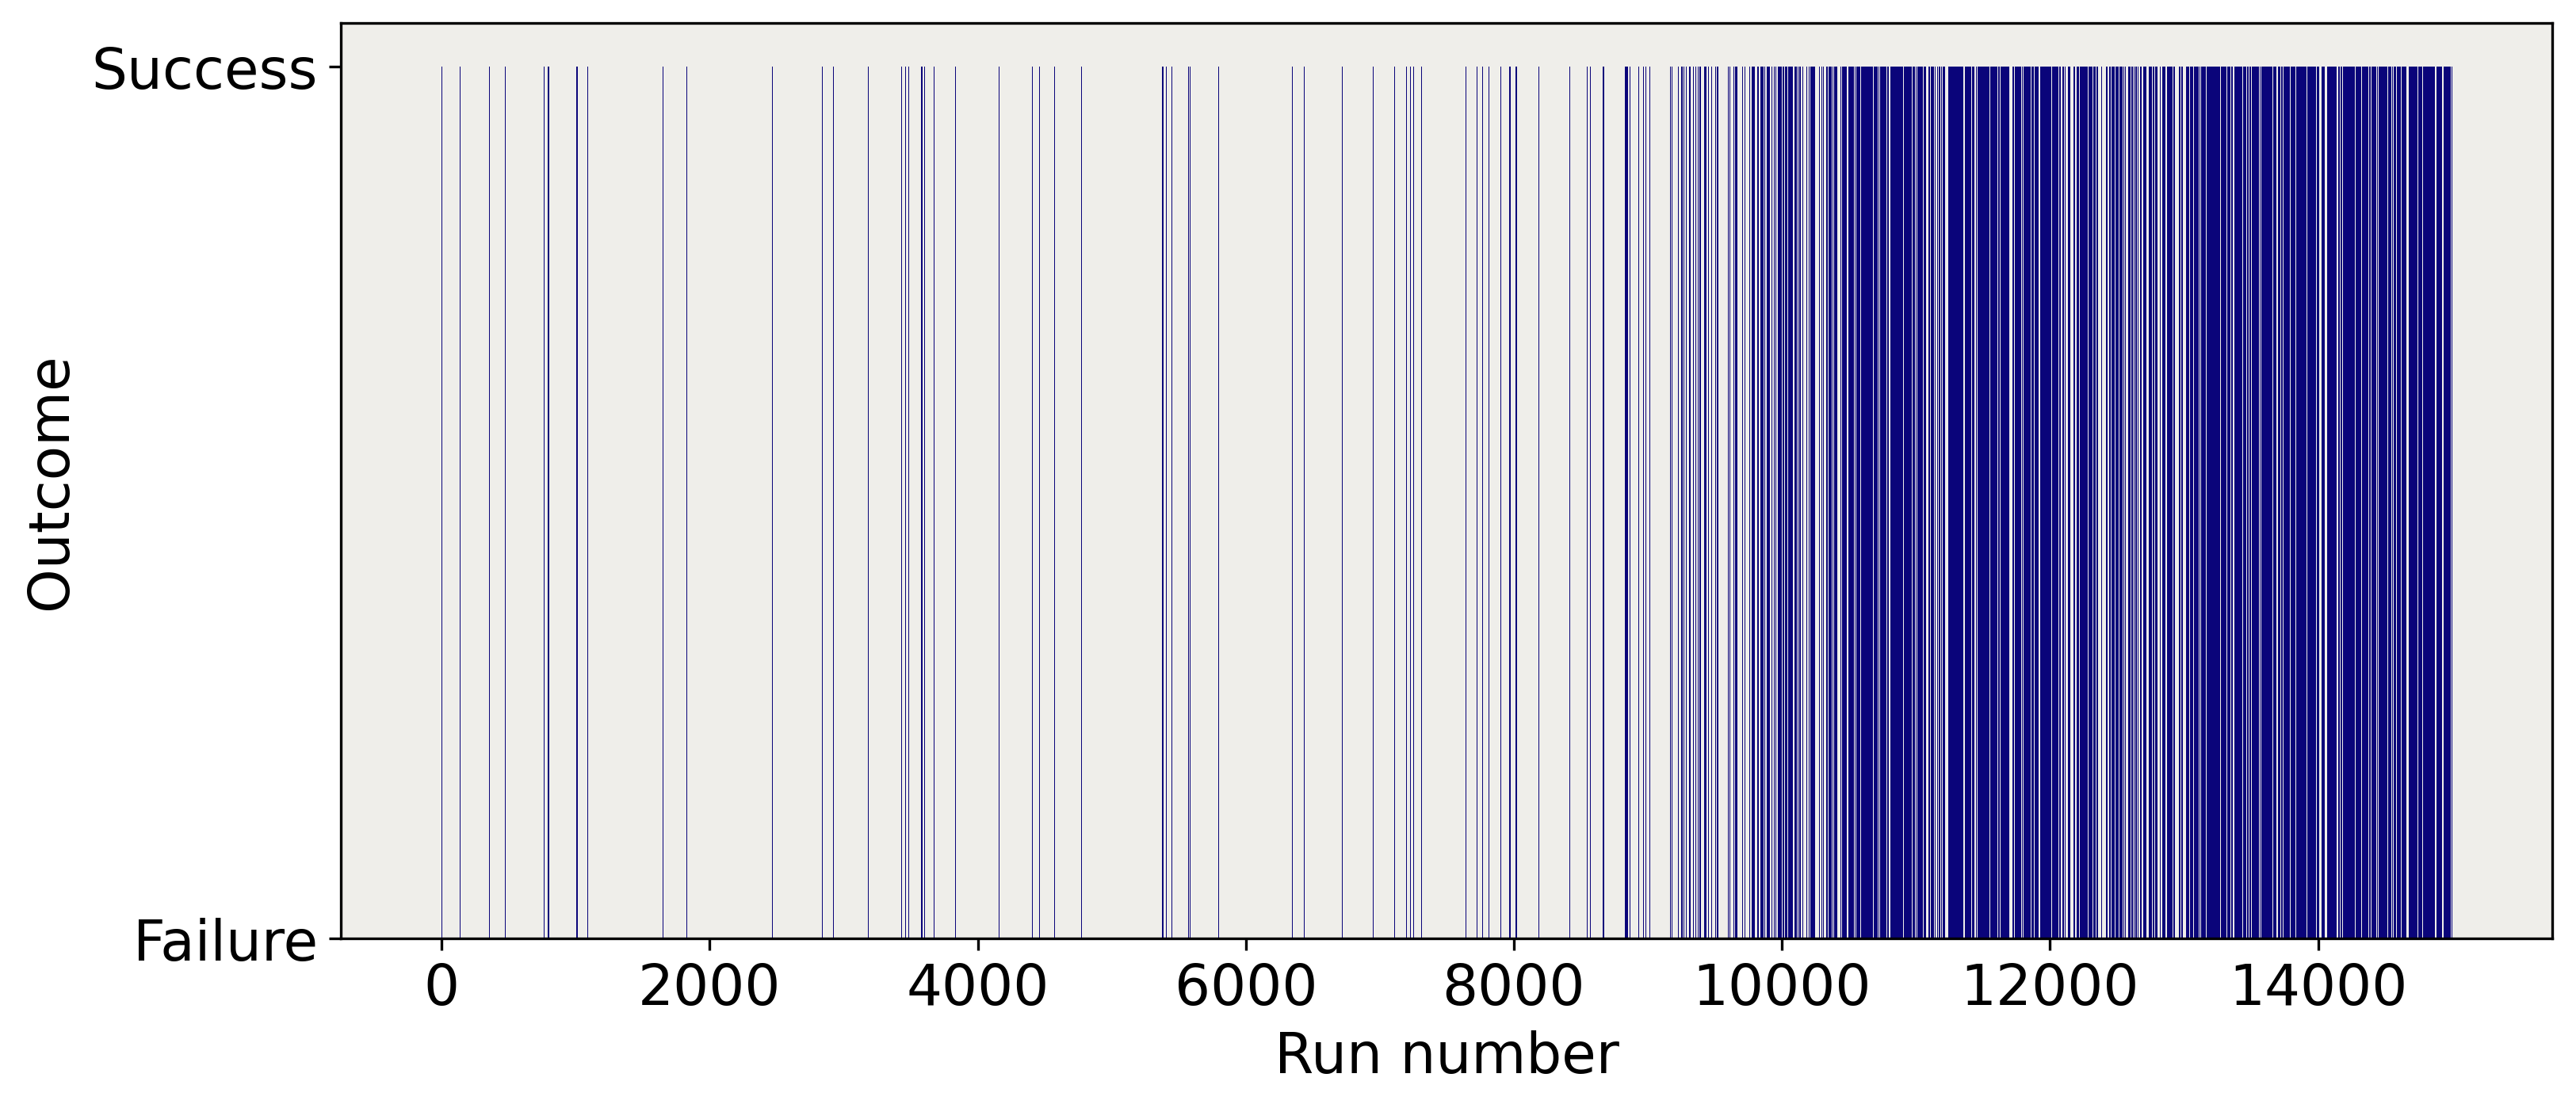

Success rate = 91.0%


In [138]:
# We re-initialize the Q-table
import numpy as np
import matplotlib.pyplot as plt

qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 15000       # Total number of episodes
alpha = 0.9            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.0001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    while not done:
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
          action = environment.action_space.sample()
        else:
          action = np.argmax(qtable[state])
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = environment.step(action)

        # Modify reward based on the game outcome
        if done and reward == 0:
            reward = -3 # Falling into a hole
        elif not done:
            reward = -0.3 # Stepping on a grid
        elif reward > 0:
            reward = 10 # Reaching the goal

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        state = new_state

        if reward == 10:
          outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    state = environment.reset()[0]
    done = False
    
    while not done:
        action = np.argmax(qtable[state])
        new_state, reward, done, info, _ = environment.step(action)
        state = new_state
        if done and reward > 0:
            nb_success += 1  # Increment success count only if the episode ends with a positive reward

print(f"Success rate = {nb_success/episodes*100}%")


# Conclusion : Other negative rewards

The negative rewards can give a better result but these results vary. they end up between 70 - 91 percent every time I rerun this. 